<a href="https://colab.research.google.com/github/Sujitharasamsetty/Exploratory-Data-Analysis-On-Global-Terrorism-/blob/main/Exploratory_Data_Analysis_On_Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

%matplotlib inline

In [ ]:
data=pd.read_csv("globalterrorism.csv",encoding ='latin =1')
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107816,201205140008,2012,5,14,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""Afghanistan: Blast Kills 9 at Bazaar,"" The Ne...","""Afghanistan blast kills nine, Interior Minist...","""Bomb kills seven in Afghan market,"" Agence Fr...",START Primary Collection,0.0,0.0,0.0,0.0,NaN
107817,201205140010,2012,5,14,2012-05-14 00:00:00,0,NaN,209,Turkey,10,...,NaN,"""Unknown group attacks children's home in Turk...",NaN,NaN,START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
107818,201205140011,2012,5,14,NaN,0,NaN,92,India,6,...,NaN,"""Four injured in grenade attack,"" Press Trust ...","""Four civilians injured in IHK blast,"" Plus Ne...","""Indian Army Busts Militant Hideout, Seize Amm...",START Primary Collection,-9.0,-9.0,0.0,-9.0,NaN
107819,201205140012,2012,5,14,NaN,0,NaN,182,Somalia,11,...,Casualty numbers for this incident conflict ac...,"""Blast hits Ethiopian convoy in central Somali...","""Landmine Blast Rocks Ethiopian Convoy in Bele...","""Somalia: Al-Shabaab Targets Ethiopian Forces ...",START Primary Collection,-9.0,-9.0,1.0,1.0,NaN


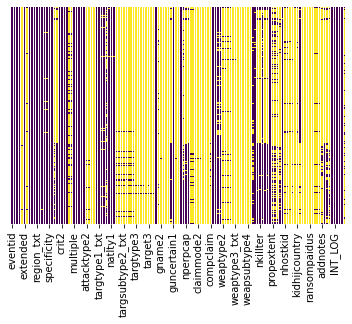

In [14]:
# Here We are cleaning the data and checking for any missing values(NAN) and their percentage of missing

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')